<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Task 2

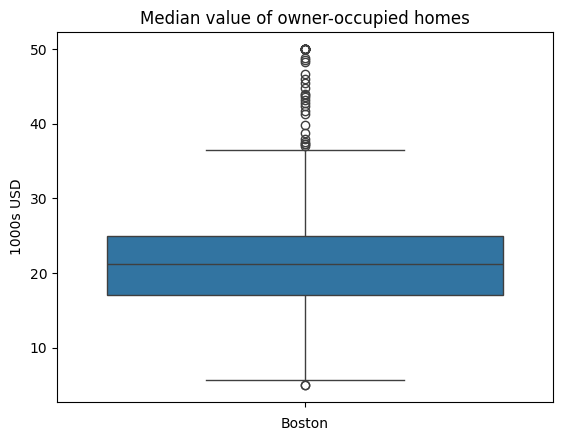

In [8]:
# For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(y='MEDV', data=boston_df)
pyplot.title('Median value of owner-occupied homes')
pyplot.xlabel('Boston')
pyplot.ylabel('1000s USD')
pyplot.show()

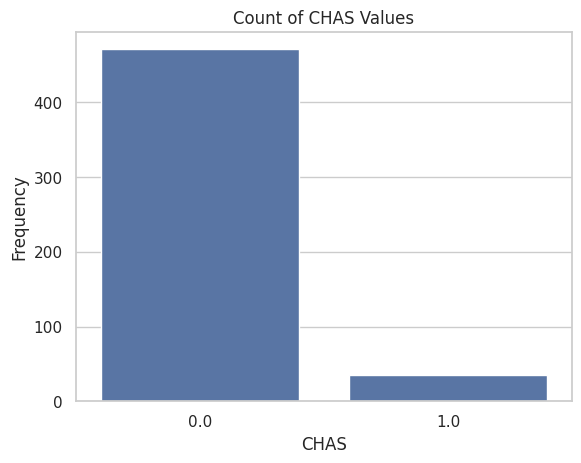

In [17]:
# Provide a bar plot for the Charles river variable
# Count the occurrences of 0 and 1 in the 'CHAS' column
counts = boston_df['CHAS'].value_counts().reset_index()
counts.columns = ['CHAS', 'Count']

# Create a bar plot
ax = sns.barplot(x='CHAS', y='Count', data=counts)

# Add a title and labels
pyplot.title('Count of CHAS Values')
pyplot.xlabel('CHAS')
pyplot.ylabel('Frequency')
pyplot.show()

<Figure size 1000x600 with 0 Axes>

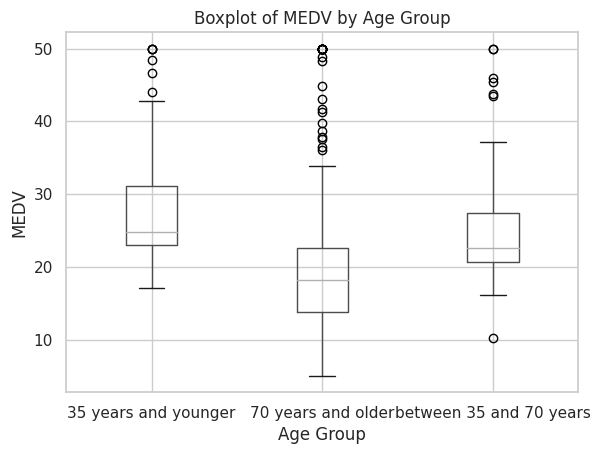

In [21]:
# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years )
# and 70 years and older

# discretizing age variable
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

# creating the boxplot
pyplot.figure(figsize=(10, 6))
boston_df.boxplot(column='MEDV', by='age_group')
pyplot.title('Boxplot of MEDV by Age Group')
pyplot.suptitle('')
pyplot.xlabel('Age Group')
pyplot.ylabel('MEDV')
pyplot.show()


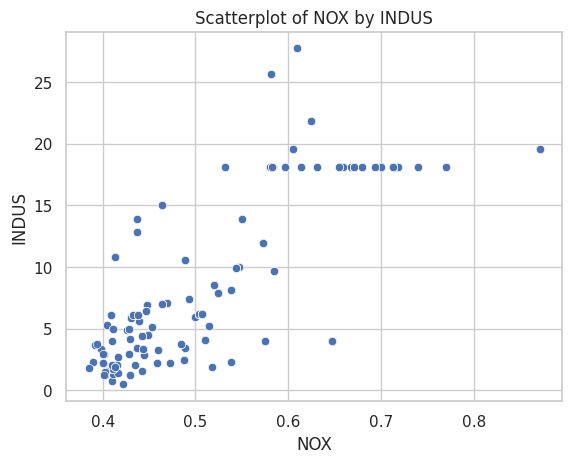

In [22]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of 
# non-retail business acres per town. What can you say about the relationship?

ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('Scatterplot of NOX by INDUS')
pyplot.xlabel('NOX')
pyplot.ylabel('INDUS')
pyplot.show()

### Conclusion - We can see a positive corelation between 2 variables as dots are grouped around a line going upwards to the right from charts beginning.

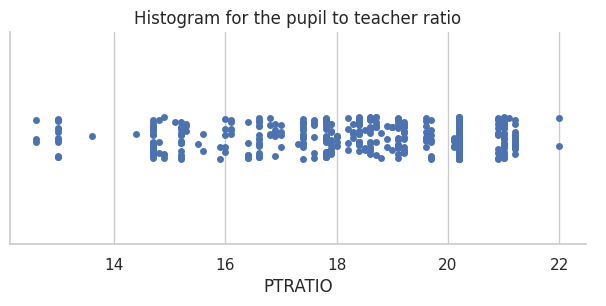

In [26]:
# Create a histogram for the pupil to teacher ratio variable
sns.catplot(x='PTRATIO', data=boston_df, height = 3, aspect = 2)
pyplot.title('Histogram for the pupil to teacher ratio')
pyplot.xlabel('PTRATIO')
pyplot.show()

## Task 3

### Is there a significant difference in median value of houses bounded by the Charles river or not? 
(T-test for independent samples)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no significant difference in median value of houses bounded by the Charles river or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a significant difference in median value of houses bounded by the Charles river or not")

α = 0.05

I use ttest

In [28]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Conclusion**: Pvalue < α therefore we reject the null hypotesis as there is a significant difference in median value of houses bounded by the Charles river or not

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

α = 0.05

In [30]:
# I group AGE variable into 3 groups

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

# test for equality of variance

scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'],
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'],
                   center='mean')


LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

p-value is greater than 0.05, the variance are equal

In [31]:
# I separate groups into values
first_group = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
second_group = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
third_group = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

# I run a one-way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(first_group, second_group, third_group)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion**: Since the p-value is less tan 0.05, we reject the null hypothesis as there is significant evidence that at least one of the means differ.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0:$ there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
*   $H\_1:$ there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

α = 0.05



In [32]:
# I use peason correlation 
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion**: Since p-value is less than 0.05 we reject the Null hypothesis as there is a a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis:

* $H_0: β1$ = 0 (additional weighted distance has no effect on the median value)
* $H_1: β1$ is not equal to 0 (additional weighted distance has an effect on the median value)

α = 0.05

In [33]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        15:52:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion**: The p-value is less than 0.05 therefore we can reject Null hypothesis as additional weighted distance has an effect on the median value. The coefficient of 1.0916 means that additional weighted distance increases the median value 1.0916.